In [1]:
import pandas as pd
import os
import numpy as np

# Acceder a la ruta donde se encuentra los archivos
ruta = os.getcwd()

In [2]:
# Leemos el archivo .csv
dataNotebooks = pd.read_excel(ruta+r"\Facturación Notebooks.xlsx", sheet_name="NOTEBOOKs")
dataClientes = pd.read_excel(ruta+r"\Facturación Notebooks.xlsx", sheet_name="CLIENTES")

In [3]:
dataNotebooks.head(3)

,ID_NOTEBOOK,MARCA,PRODUCTO,TIPO,PULGADAS,RESOLUCION,MARCA_PROCESADOR,PROCESADOR,RAM_(GB),MEMORIA,PLACA_VIDEO,SISTEMA_OPERATIVO,PESO_(KG),PRECIO,MONEDA
0,NOT_00001,Apple,MacBook Pro,Ultrabook,13,2K,Intel,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Dólar
1,NOT_00002,Apple,Macbook Air,Ultrabook,13,HD,Intel,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Dólar
2,NOT_00003,HP,250 G6,Notebook,15,Full HD,Intel,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Dólar


In [4]:
dataClientes.head(2)

,ID_CLIENTE,NOMBRE,EDAD,PAIS,PROVINCIA
0,CLIENTE_00001,Tiziano Uriel,33,ARGENTINA,Catamarca
1,CLIENTE_00002,Tiago Benjamin,31,ARGENTINA,Tucumán


In [5]:
print(dataNotebooks.shape)
print(dataClientes.shape)

(1302, 15)
(999, 5)


In [6]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Supongamos que ya tienes los dataframes 'dataNotebooks' y 'dataClientes' cargados con los datos correspondientes

# Crear una lista de fechas para el año 2022
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 1, 30)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Definir una lista de posibles ID_NOTEBOOKs y PRECIOs
id_notebooks = dataNotebooks['ID_NOTEBOOK'].tolist()

# Definir una lista de posibles ID_CLIENTE, NOMBREs y PROVINCIAs
dni_clientes = dataClientes['ID_CLIENTE'].tolist()

# Generar ventas para cada día del año 2022
ventas = []
id_venta_count = 1  # Contador para el ID de venta

for fecha in date_range:
    num_ventas = random.randint(3, 9)
    for _ in range(num_ventas):
        id_notebook = random.choice(id_notebooks)
        precio_notebook = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'PRECIO'].iloc[0]
        marca = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'MARCA'].iloc[0]
        producto = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'PRODUCTO'].iloc[0]
        marca_procesador = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'MARCA_PROCESADOR'].iloc[0]
        sistema_operativo = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'SISTEMA_OPERATIVO'].iloc[0]

        dni_cliente = random.choice(dni_clientes)
        nombre_cliente = dataClientes.loc[dataClientes['ID_CLIENTE'] == dni_cliente, 'NOMBRE'].iloc[0]
        provincia_cliente = dataClientes.loc[dataClientes['ID_CLIENTE'] == dni_cliente, 'PROVINCIA'].iloc[0]

        # Generar el ID de venta con formato "VENTA_0001"
        id_venta = f"VENTA_{str(id_venta_count).zfill(4)}"
        id_venta_count += 1

        venta = {
            'ID_VENTA': id_venta,
            'FECHA': fecha.strftime('%Y-%m-%d'),
            'MARCA': marca,
            'PRODUCTO': producto,
            'MARCA_PROCESADOR': marca_procesador,
            'SISTEMA_OPERATIVO': sistema_operativo,
            'PRECIO': precio_notebook,
            'NOMBRE_CLIENTE': nombre_cliente,
        }
        ventas.append(venta)

# Crear un DataFrame con las ventas generadas
dataNotebooks = pd.DataFrame(ventas)

# TRansformamos la columna en Datatime
dataNotebooks["FECHA"] = pd.to_datetime(dataNotebooks["FECHA"])



In [7]:
dataNotebooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_VENTA           189 non-null    object        
 1   FECHA              189 non-null    datetime64[ns]
 2   MARCA              189 non-null    object        
 3   PRODUCTO           189 non-null    object        
 4   MARCA_PROCESADOR   189 non-null    object        
 5   SISTEMA_OPERATIVO  189 non-null    object        
 6   PRECIO             189 non-null    float64       
 7   NOMBRE_CLIENTE     189 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 11.9+ KB


In [8]:
# Guardar el DataFrame en un archivo CSV
dataNotebooks.to_csv('Ventas de Notebooks.csv', index=False)

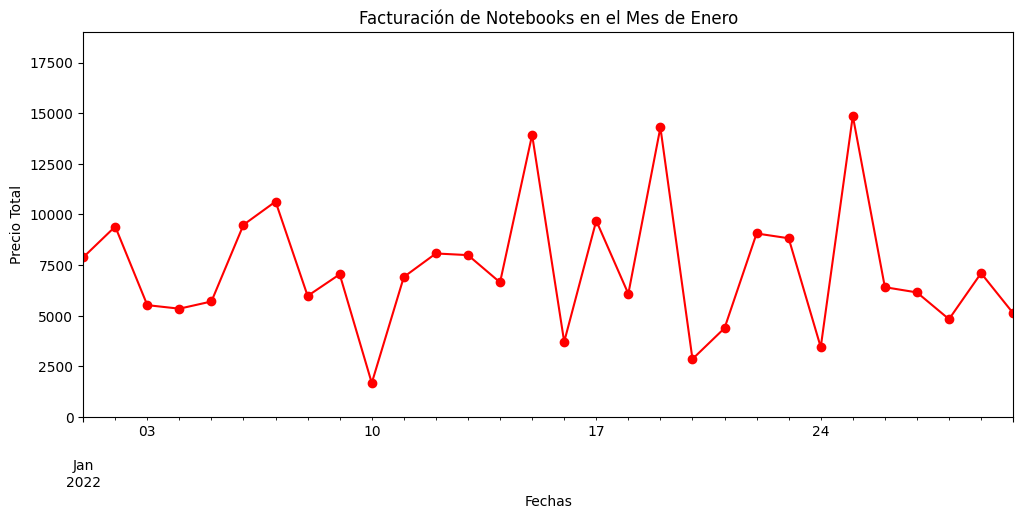

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'dataNotebooks' con la columna 'FECHA' en formato datetime

# Ordenar el DataFrame por fecha (opcional, si deseas que las fechas estén en orden en el gráfico)
dataNotebooks.sort_values(by='FECHA', inplace=True)

agrupamientoFechas = dataNotebooks.groupby("FECHA")["PRECIO"].sum()

# Generamos el gráfico de líneas
plt.figure(figsize=(12, 5))  # Tamaño del gráfico (opcional, puedes ajustarlo según tus preferencias)

agrupamientoFechas.plot.line(marker='o', color='r')

# Mostrar todas las etiquetas de fechas en el eje x
# num_fechas = len(agrupamientoFechas.index)
#plt.xticks(range(len(agrupamientoFechas.index.astype(str))), agrupamientoFechas.index.astype(str), rotation=0)

# # Configurar los major y minor ticks para que se muestren todas las fechas en el eje x
# num_fechas = len(agrupamientoFechas.index)
# plt.xticks(range(num_fechas), agrupamientoFechas.index.strftime('%Y-%m-%d'), rotation=45, ha='right')
# plt.minorticks_on()
# plt.xticks(minor=True)


# Configuramos la visualización
plt.title('Facturación de Notebooks en el Mes de Enero')
plt.ylabel('Precio Total')
plt.xlabel('Fechas')
plt.ylim(0, 19000)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Process dataset
agrupamientoFechas['FECHA'] = pd.to_datetime(agrupamientoFechas['FECHA'])
bitcoin['Open'] = pd.to_numeric(bitcoin['Open'])

# Plot
plt.figure()
plt.plot(bitcoin['Date'], bitcoin['Open'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()

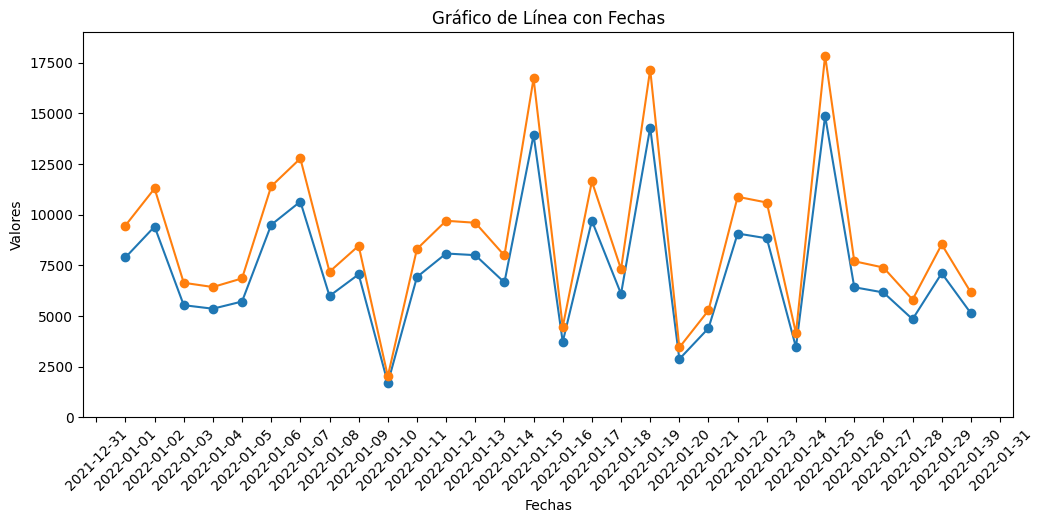

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#import matplotlib.dates as mdates

# # Ejemplo de fechas (en formato datetime)
# fechas = [datetime(2023, 7, 1) + timedelta(days=i) for i in range(10)]

# # Ejemplo de valores para cada fecha
# valores = np.sin(np.arange(10))

# Crear el gráfico de línea

plt.figure(figsize=(12, 5))
plt.plot(agrupamientoFechas.index, agrupamientoFechas.values, marker='o', linestyle='-')
plt.plot(agrupamientoFechas.index, (agrupamientoFechas.values * 1.2), marker='o', linestyle='-')


plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Establecer el formato de las fechas en el eje x

# Ajustar las etiquetas del eje x para que no se superpongan
#plt.gcf().autofmt_xdate()

# Agregar etiquetas y título
plt.xlabel('Fechas')
plt.ylabel('Valores')
plt.title('Gráfico de Línea con Fechas')
plt.ylim(0, 19000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [11]:
agrupamientoFechas.index.strftime('%Y-%m-%d')

Index(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
       '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
       '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
       '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
       '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30'],
      dtype='object', name='FECHA')

In [120]:
agrupamientoFechas.index.astype(str)

Index(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
       '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
       '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
       '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
       '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30'],
      dtype='object', name='FECHA')

In [51]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Supongamos que ya tienes los dataframes 'dataNotebooks' y 'dataClientes' cargados con los datos correspondientes

# Crear una lista de fechas para el año 2022
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 1, 28)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Definir una lista de posibles ID_NOTEBOOKs y PRECIOs
id_notebooks = dataNotebooks['ID_NOTEBOOK'].tolist()
precios_notebooks = dataNotebooks['PRECIO'].tolist()

# Definir una lista de posibles ID_CLIENTE, NOMBREs y PROVINCIAs
dni_clientes = dataClientes['ID_CLIENTE'].tolist()
nombres_clientes = dataClientes['NOMBRE'].tolist()
provincias_clientes = dataClientes['PROVINCIA'].tolist()

# Generar ventas para cada día del año 2022
ventas = []
num_ventas_anterior = 0  # Variable para almacenar el número de ventas del día anterior
for fecha in date_range:
    # Generar una variación aleatoria en el número de ventas en función del día anterior
    variacion_ventas = random.randint(-2, 2)
    num_ventas = max(0, num_ventas_anterior + variacion_ventas)
    
    for _ in range(num_ventas):
        id_notebook = random.choice(id_notebooks)
        precio_notebook = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'PRECIO'].iloc[0]
        marca = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'MARCA'].iloc[0]
        producto = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'PRODUCTO'].iloc[0]
        marca_procesador = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'MARCA_PROCESADOR'].iloc[0]
        sistema_operativo = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'SISTEMA_OPERATIVO'].iloc[0]
        peso_kg = dataNotebooks.loc[dataNotebooks['ID_NOTEBOOK'] == id_notebook, 'PESO_(KG)'].iloc[0]

        dni_cliente = random.choice(dni_clientes)
        nombre_cliente = dataClientes.loc[dataClientes['ID_CLIENTE'] == dni_cliente, 'NOMBRE'].iloc[0]
        provincia_cliente = dataClientes.loc[dataClientes['ID_CLIENTE'] == dni_cliente, 'PROVINCIA'].iloc[0]

        venta = {
            'FECHA': fecha.strftime('%Y-%m-%d'),
            'ID_NOTEBOOK': id_notebook,
            'PRECIO': precio_notebook,
            'MARCA': marca,
            'PRODUCTO': producto,
            'MARCA_PROCESADOR': marca_procesador,
            'SISTEMA_OPERATIVO': sistema_operativo,
            'PESO_(KG)': peso_kg,
            'DNI_CLIENTE': dni_cliente,
            'NOMBRE_CLIENTE': nombre_cliente,
            'PROVINCIA_CLIENTE': provincia_cliente,
        }
        ventas.append(venta)
    
    num_ventas_anterior = num_ventas

# Crear un DataFrame con las ventas generadas
df_ventas2 = pd.DataFrame(ventas)

# Guardar el DataFrame en un archivo CSV
#df_ventas2.to_csv('ventas_generadas.csv', index=False)


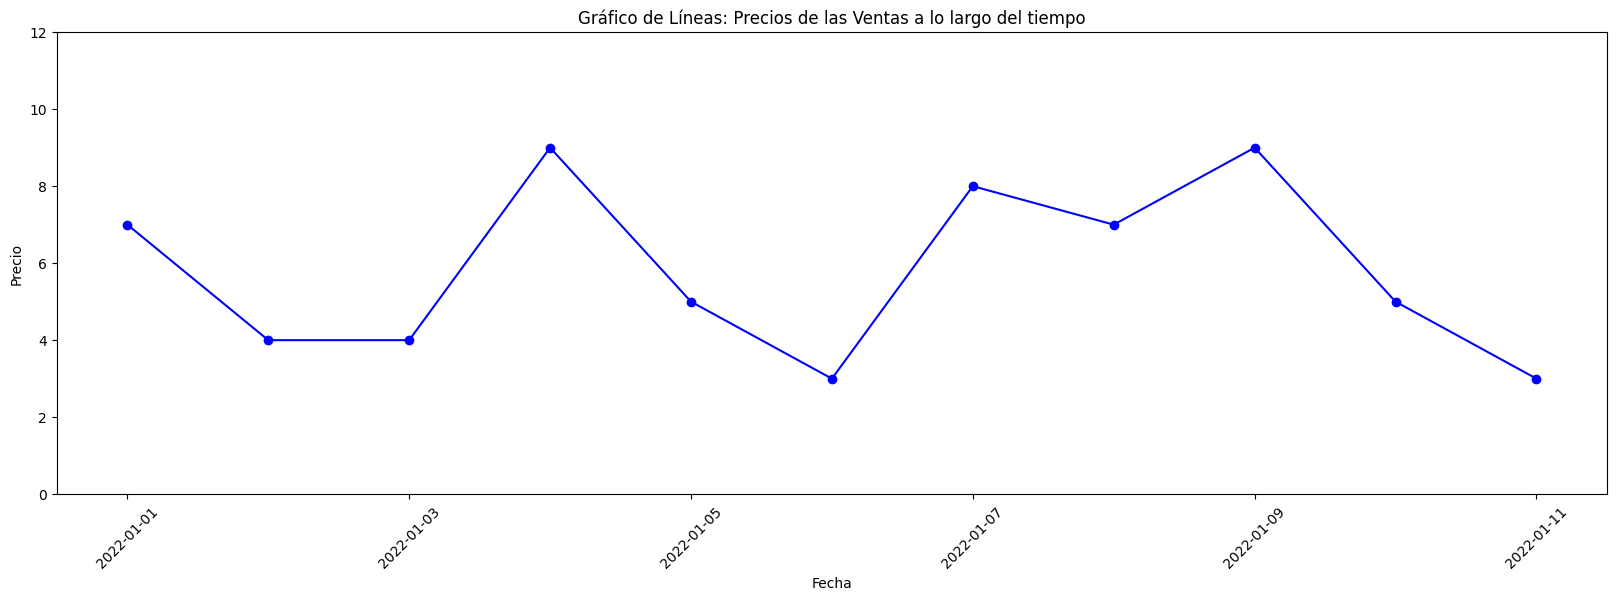

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# Convertir la columna 'FECHA' a formato datetime para ordenar adecuadamente
df_ventas2['FECHA'] = pd.to_datetime(df_ventas['FECHA'])

# Ordenar el DataFrame por fecha (opcional, si deseas que las fechas estén en orden en el gráfico)
df_ventas2.sort_values(by='FECHA', inplace=True)

agrupamientoVentas = df_ventas2.groupby("FECHA")["PRECIO"].count()

# Crear el gráfico de líneas
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional, puedes ajustarlo según tus preferencias)

plt.plot(agrupamientoVentas.index, agrupamientoVentas.values, marker='o', color='b')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Gráfico de Líneas: Precios de las Ventas a lo largo del tiempo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles (opcional)

# Establecer límites para el eje y entre 0 y 40
plt.ylim(0, 12)

# Mostrar el gráfico
plt.show()
